In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Загружаем данные

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
X = digits.data
y = digits.target


In [ ]:
X.shape

(1797, 64)

In [ ]:
N, d = X.shape

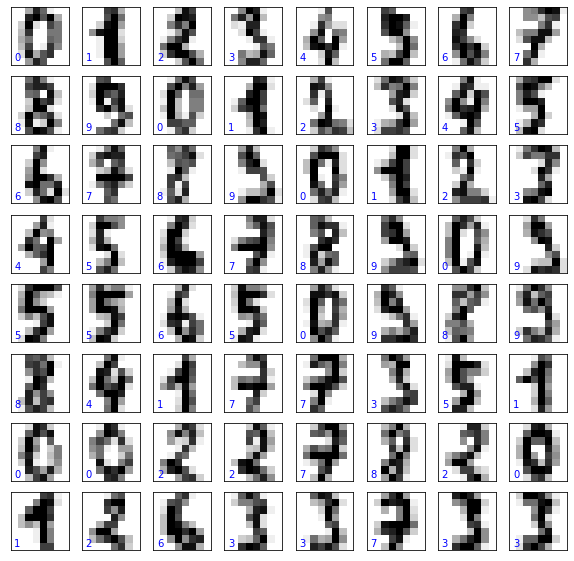

In [ ]:
plt.figure(figsize = (10, 10)) # Размер окна в дюймах
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X[i, :], (8, 8)))
    plt.text(0, 7, str(digits.target[i]), color = 'b')
    plt.set_cmap('binary')

In [ ]:
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 7)
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

N_test = X_test.shape[0]
N_test

594

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

0.9865319865319865
0.013468013468013467


In [ ]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 67,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  0,  0, 58]])

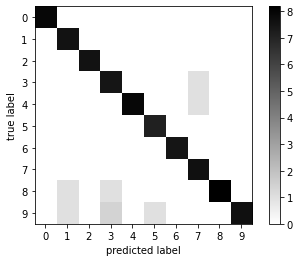

In [ ]:
M = metrics.confusion_matrix(y_test, y_test_pred)
#M = M - np.diag(np.diag(M))
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

In [ ]:
kk = range(1, 30, 2)
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

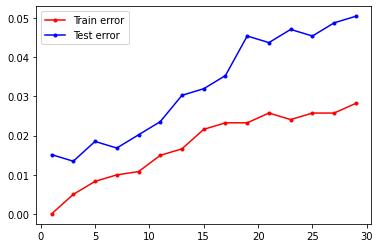

In [ ]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
#plt.gca().set_xscale('log')

In [ ]:
print(min(err_test))
print(kk[err_test.index(min(err_test))])

0.013468013468013467
3


(30.0, 0.0)

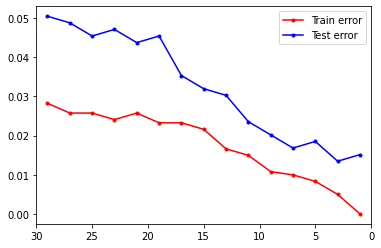

In [ ]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 1)
plt.xlim([30, 0])

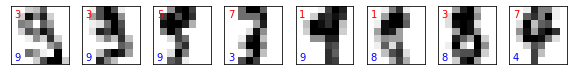

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
i=1
plt.figure(figsize = (10, 10)) # Размер окна в дюймах
i_subplot = 1 
yi_test_pred =model.predict(X_test)
for i in range(N_test):
    if yi_test_pred[i]!= y_test[i]:
        plt.subplot(8, 8, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.reshape(X_test[i, :], (8, 8)), cmap = plt.cm.binary)
        plt.text(0, 7, str(y_test[i]),    color = 'b')        
        plt.text(0, 1, str(yi_test_pred[i]), color = 'r')

## Плюсы и минусы метода $k$NN

**Плюсы**

* Простой метод
* Для ряда задач показывает неплохие результаты (как, например, в задаче распознавания рукописных цифр)
* Достаточно устойчив к выбросам (при подходящем выборе $k$)
* Работает как с числовыми, так и номинальными признаками

**Минусы**

* Сколько соседей брать?
* Какую метрику использовать?
* Необходимо хранить всю выборку
* Слишком медленный (но можно использовать ускоренные алгоритмы, например, kd-деревья и т.д.)
* Подвержен проклятию размерности

# Bonus: Понижение размерности

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X) # или сразу pca.fit_transform(X)
X_pca.shape

(1797, 2)

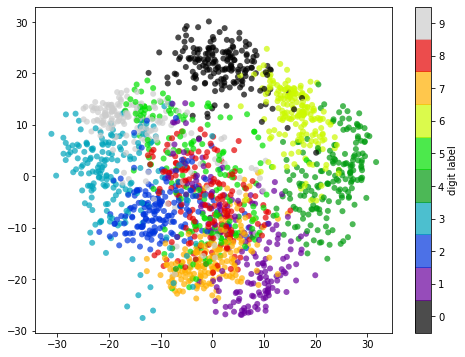

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = digits.target, 
            edgecolor = 'none', alpha = .7)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

## Isomap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components = 2)
iso.fit(X)
X_iso = iso.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
X_iso.shape

(1797, 2)

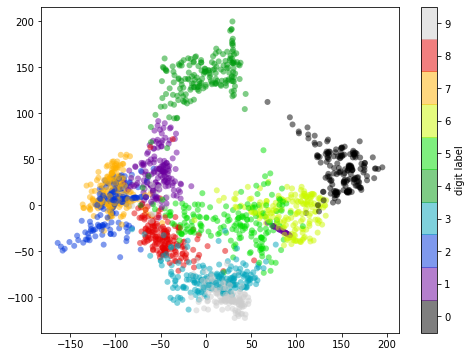

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

## Случайная проекция

In [ ]:
from sklearn import random_projection
rp = random_projection.SparseRandomProjection(n_components = 2, random_state = 41)
rp.fit(X)
X_rp = rp.transform(X)

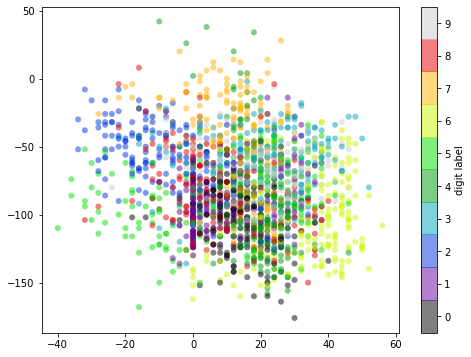

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(X_rp[:, 0], X_rp[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
mlda = LDA(n_components = 2)
mlda.fit(X, y)
X_lda = mlda.transform(X)

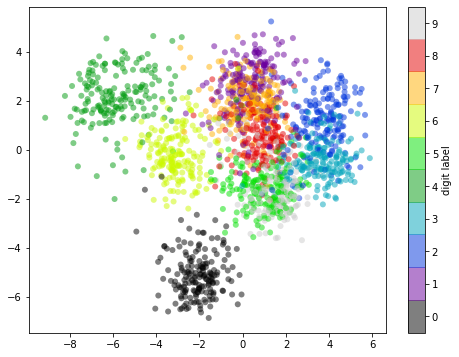

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


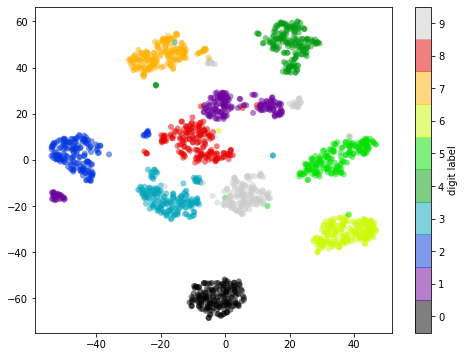

In [ ]:
# Визуализируем 4-мерные данные на плоскость
from sklearn.manifold import TSNE

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(X)

# Представляем результат в двумерных координатах

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.figure(figsize = (8, 6))
plt.scatter(x_axis, y_axis, c = digits.target, edgecolor = 'none', alpha = 0.5)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)